In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [13]:
file="C:/Users/dhara/OneDrive/Desktop/globalterrorismdb_0718dist.csv"

In [14]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [15]:
data = pd.read_csv(file,encoding='ISO-8859-1',low_memory=False)
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [16]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [17]:
data.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

In [18]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [19]:
cols=['iyear','imonth','iday','country_txt','city','latitude',
      'longitude','location','attacktype1_txt','targtype1_txt','targsubtype1_txt','target1',
      'gname','motive','weaptype1_txt','dbsource','region_txt','nkill','nwound','natlty1_txt','weapdetail'
      ]

In [20]:
Terror_c=pd.DataFrame(data=data,columns=cols)

Terror_c.head()

In [21]:
Terror_c.isnull().sum()

iyear                    0
imonth                   0
iday                     0
country_txt              0
city                   434
latitude              4556
longitude             4557
location            126196
attacktype1_txt          0
targtype1_txt            0
targsubtype1_txt     10373
target1                636
gname                    0
motive              131130
weaptype1_txt            0
dbsource                 0
region_txt               0
nkill                10313
nwound               16311
natlty1_txt           1559
weapdetail           67670
dtype: int64

In [22]:
Terror_c.rename(columns={'iyear':'year' , 'imonth':'month' ,'iday':'day','country_txt':'country name','attacktype1_txt':'attacktype','targtype1_txt':'targtype','targsubtype2':'targsubtype2',
              'gname':'group_name','weaptype1_txt':'weaptype','dbsource':'source','region_txt':'region1','nkill':'Killed','nwound':'Wounded','weapdetail':'weapon_detail','natlty1_txt':'nationality'
 } , inplace=True)

In [23]:
pd.set_option("display.max_columns",500)

In [24]:
Terror_c['casualities']=Terror_c['Wounded']+Terror_c['Killed']

In [25]:
Terror_c.head(3)

,year,month,day,country name,city,latitude,longitude,location,attacktype,targtype,targsubtype1_txt,target1,group_name,motive,weaptype,source,region1,Killed,Wounded,nationality,weapon_detail,casualities
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN,1.0
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,PGIS,North America,0.0,0.0,Belgium,NaN,0.0
2,1970,1,0,Philippines,Unknown,15.478598,120.599741,NaN,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,NaN,Unknown,PGIS,Southeast Asia,1.0,0.0,United States,NaN,1.0


In [26]:
nationality_top = Terror_c[Terror_c['nationality'] != 'Unknown']

In [27]:
nationality_type=nationality_top['nationality'].value_counts().reset_index()

In [28]:
nationality_type.rename(columns={"index":'Nationality','nationality':'Counts'},inplace=True)
nationality_type


,Nationality,Counts
0,Iraq,24113
1,Pakistan,13900
2,India,12098
3,Afghanistan,10931
4,Colombia,7922
...,...,...
210,People's Republic of the Congo,1
211,Saba (Netherlands Antilles),1
212,Tuvalu,1
213,Western Sahara,1


In [29]:
Terror_c['nationality'].unique()

array(['Dominican Republic', 'Belgium', 'United States', 'Uruguay',
       'Germany', 'Great Britain', 'Venezuela', 'Puerto Rico', 'Israel',
       'Austria', 'Switzerland', 'Jordan', 'Ethiopia', 'Spain', nan,
       'Japan', 'International', 'Egypt', 'Paraguay', 'Soviet Union',
       'Ireland', 'Argentina', 'Philippines', 'China',
       'West Bank and Gaza Strip', 'Multinational', 'Northern Ireland',
       'Brazil', 'Haiti', 'South Africa', 'Portugal', 'Colombia',
       'Greece', 'Nicaragua', 'Indonesia', 'Yugoslavia', 'Italy',
       'Rhodesia', 'Ivory Coast', 'Iran', 'Canada', 'Poland', 'Sweden',
       'Turkey', 'Costa Rica', 'Russia', 'Iraq', 'Cuba', 'France',
       'Malawi', 'Democratic Republic of the Congo', 'Netherlands',
       'Chile', 'Hong Kong', 'Yemen', 'Mexico', 'Syria', 'India',
       'New Zealand', 'Senegal', 'Algeria', 'Peru', 'Czechoslovakia',
       'Saudi Arabia', 'Denmark', 'West Germany (FRG)', 'Bahamas',
       'Bolivia', 'El Salvador', 'Botswana', 'Guate

In [30]:
terr= Terror_c[Terror_c['group_name'] != 'Unknown']
Terror_Group_Org=terr['group_name'].value_counts().reset_index()
Terror_Group_Org.rename(columns={"index":'Group_name','group_name':'Counts'},inplace=True)
Terror_Group_Org

,Group_name,Counts
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
...,...,...
3531,Ansar Sarallah,1
3532,Sword of Islam,1
3533,Support of Ocalan-The Hawks of Thrace,1
3534,Arab Revolutionary Front,1


In [31]:
Terror_c.head(3)

,year,month,day,country name,city,latitude,longitude,location,attacktype,targtype,targsubtype1_txt,target1,group_name,motive,weaptype,source,region1,Killed,Wounded,nationality,weapon_detail,casualities
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN,1.0
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,PGIS,North America,0.0,0.0,Belgium,NaN,0.0
2,1970,1,0,Philippines,Unknown,15.478598,120.599741,NaN,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,NaN,Unknown,PGIS,Southeast Asia,1.0,0.0,United States,NaN,1.0


In [32]:
city1= Terror_c[Terror_c['city'] != 'Unknown']

In [33]:
city_cln=city1['city'].value_counts().reset_index()
city_cln.rename(columns={"index":'City_name','city':'Counts'},inplace=True)
city_cln

,City_name,Counts
0,Baghdad,7589
1,Karachi,2652
2,Lima,2359
3,Mosul,2265
4,Belfast,2171
...,...,...
36668,Hotwag,1
36669,Ostend,1
36670,Balughata,1
36671,Jikoyi,1


In [34]:
cor=Terror_c.corr()

<AxesSubplot:>

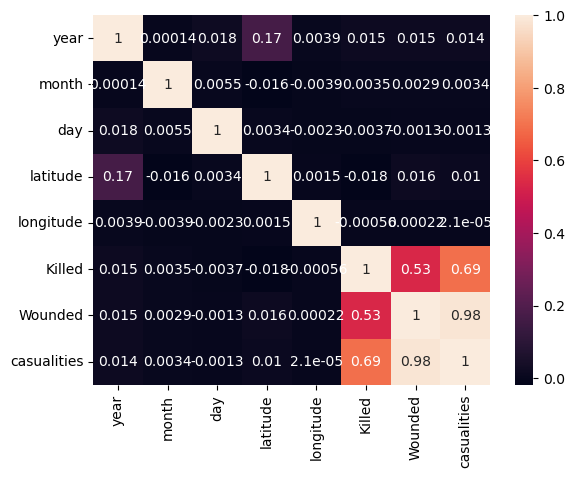

In [35]:
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)

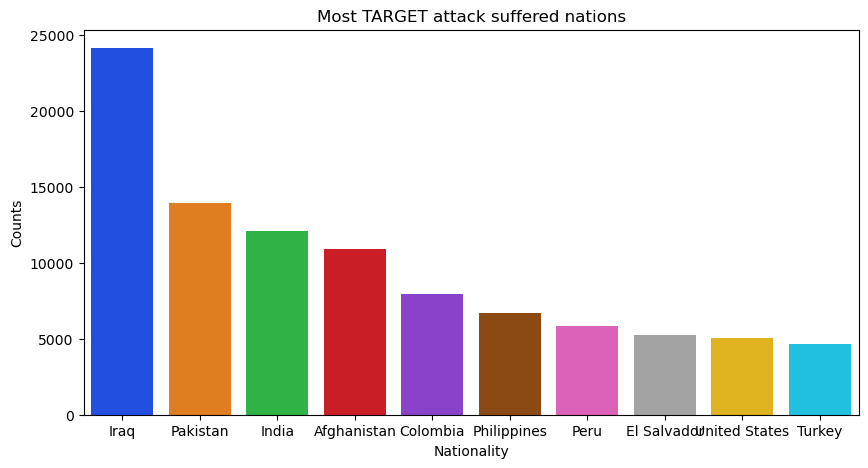

In [36]:
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(y="Counts", x="Nationality", data=nationality_type[:10],
                 palette="bright").set_title('Most TARGET attack suffered nations')

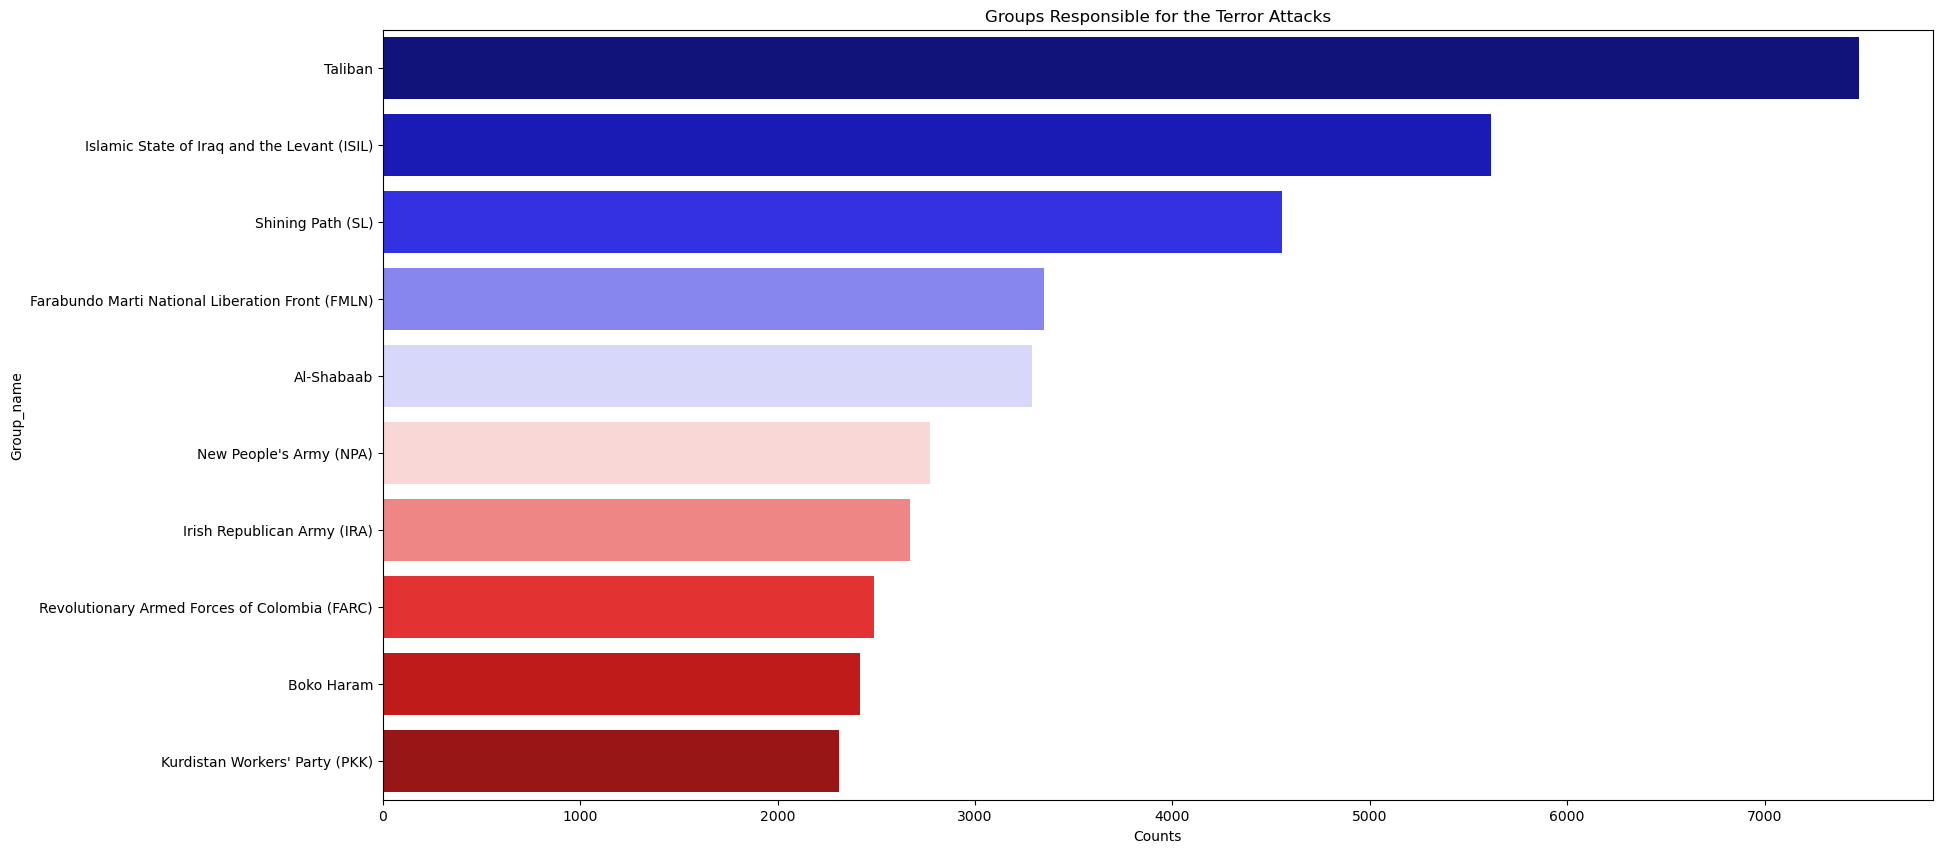

In [37]:
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x="Counts", y="Group_name", data=Terror_Group_Org[:10],
                 palette="seismic").set_title('Groups Responsible for the Terror Attacks')